In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Global Data

In [2]:
global_data = pd.read_csv(r'C:\Users\ibabk\Documents\Udacity Data Analyst\Project 1\Global_Data.csv')
global_data.rename(columns={'year':'Year', 'avg_temp':'Global Average Temperature'}, inplace=True)
global_data.set_index('Year', inplace=True)
global_data

,Global Average Temperature
Year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47
...,...
2011,9.52
2012,9.51
2013,9.61


## Edinburgh data

In [3]:
edinburgh_data = pd.read_csv(r'C:\Users\ibabk\Documents\Udacity Data Analyst\Project 1\Edinburgh_Data.csv')
drop_columns = ['city', 'country']
edinburgh_data.drop(drop_columns, axis = 1, inplace=True)
edinburgh_data.rename(columns={'year':'Year', 'avg_temp':'Edinburgh Average Temperature'}, inplace=True)
edinburgh_data.set_index('Year', inplace=True)
edinburgh_data

,Edinburgh Average Temperature
Year,
1743,5.27
1744,8.29
1745,2.75
1746,NaN
1747,NaN
...,...
2009,8.64
2010,7.43
2011,8.95


### Combining the two datasets

In [4]:
dataset = edinburgh_data.join(global_data, how="inner")
dataset

,Edinburgh Average Temperature,Global Average Temperature
Year,,
1750,8.41,8.72
1751,8.16,7.98
1752,4.78,5.78
1753,7.51,8.39
1754,7.42,8.47
...,...,...
2009,8.64,9.51
2010,7.43,9.70
2011,8.95,9.52


In [5]:
x = dataset.loc[2000]
y = edinburgh_data.loc[2000]
z = global_data.loc[2000]
print(x)
print(y)
print(z)

Edinburgh Average Temperature    8.48
Global Average Temperature       9.20
Name: 2000, dtype: float64
Edinburgh Average Temperature    8.48
Name: 2000, dtype: float64
Global Average Temperature    9.2
Name: 2000, dtype: float64


### Creating a moving average dataset

In [6]:
moving_averages = pd.DataFrame()
moving_averages['Edinburgh'] = dataset['Edinburgh Average Temperature'].rolling(window=7).mean()
moving_averages['Global'] = dataset['Global Average Temperature'].rolling(window=7).mean()
moving_averages

,Edinburgh,Global
Year,,
1750,NaN,NaN
1751,NaN,NaN
1752,NaN,NaN
1753,NaN,NaN
1754,NaN,NaN
...,...,...
2009,8.831429,9.535714
2010,8.614286,9.560000
2011,8.618571,9.588571


### Plotting the results

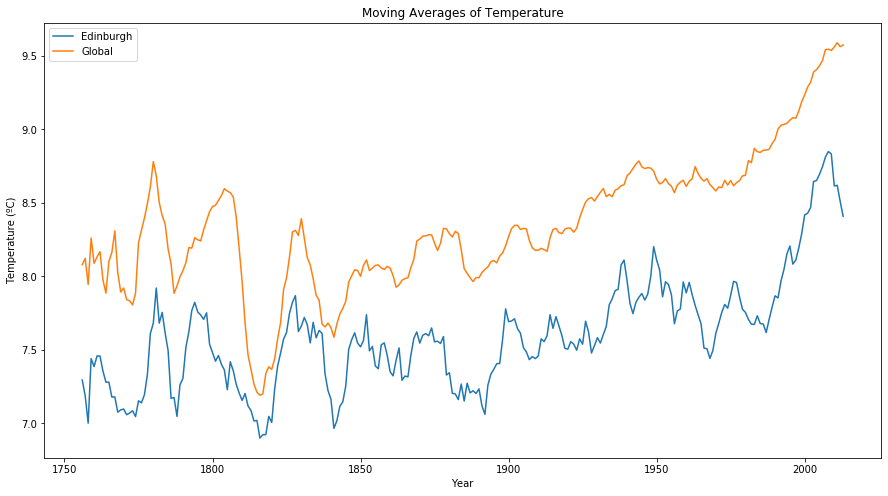

In [7]:
moving_averages['Edinburgh'].plot(figsize = (15,8))
moving_averages['Global'].plot(figsize = (15,8))
plt.title('Moving Averages of Temperature')
plt.ylabel('Temperature (ºC)')
plt.legend()
plt.show()

### Correlation Coefficients

In [8]:
dataset.corr()

,Edinburgh Average Temperature,Global Average Temperature
Edinburgh Average Temperature,1.000000,0.592681
Global Average Temperature,0.592681,1.000000


## Adding more cities

## London data

In [9]:
london_data = pd.read_csv(r'C:\Users\ibabk\Documents\Udacity Data Analyst\Project 1\London_Data.csv')
london_data.drop(drop_columns, axis = 1, inplace=True)
london_data.rename(columns={'year':'Year', 'avg_temp':'London Average Temperature'}, inplace=True)
london_data.set_index('Year', inplace=True)
london_data

,London Average Temperature
Year,
1743,7.54
1744,10.34
1745,4.13
1746,NaN
1747,NaN
...,...
2009,10.52
2010,9.38
2011,11.19


## Cardiff data

In [10]:
cardiff_data = pd.read_csv(r'C:\Users\ibabk\Documents\Udacity Data Analyst\Project 1\Cardiff_Data.csv')
cardiff_data.drop(drop_columns, axis = 1, inplace=True)
cardiff_data.rename(columns={'year':'Year', 'avg_temp':'Cardiff Average Temperature'}, inplace=True)
cardiff_data.set_index('Year', inplace=True)
cardiff_data

,Cardiff Average Temperature
Year,
1743,7.07
1744,9.80
1745,4.05
1746,NaN
1747,NaN
...,...
2009,9.90
2010,8.80
2011,10.63


### Addding new cities to the dataset

In [11]:
dataset = london_data.join(dataset, how="inner")
dataset = cardiff_data.join(dataset, how="inner")
dataset

,Cardiff Average Temperature,London Average Temperature,Edinburgh Average Temperature,Global Average Temperature
Year,,,,
1750,9.73,10.25,8.41,8.72
1751,9.51,9.99,8.16,7.98
1752,6.26,6.54,4.78,5.78
1753,8.97,9.42,7.51,8.39
1754,8.82,9.20,7.42,8.47
...,...,...,...,...
2009,9.90,10.52,8.64,9.51
2010,8.80,9.38,7.43,9.70
2011,10.63,11.19,8.95,9.52


In [12]:
moving_averages['London'] = dataset['London Average Temperature'].rolling(window=7).mean()
moving_averages['Cardiff'] = dataset['Cardiff Average Temperature'].rolling(window=7).mean()
moving_averages

,Edinburgh,Global,London,Cardiff
Year,,,,
1750,NaN,NaN,NaN,NaN
1751,NaN,NaN,NaN,NaN
1752,NaN,NaN,NaN,NaN
1753,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN
...,...,...,...,...
2009,8.831429,9.535714,10.720000,10.204286
2010,8.614286,9.560000,10.515714,9.997143
2011,8.618571,9.588571,10.575714,10.048571


### Ploting the results for 4 cities

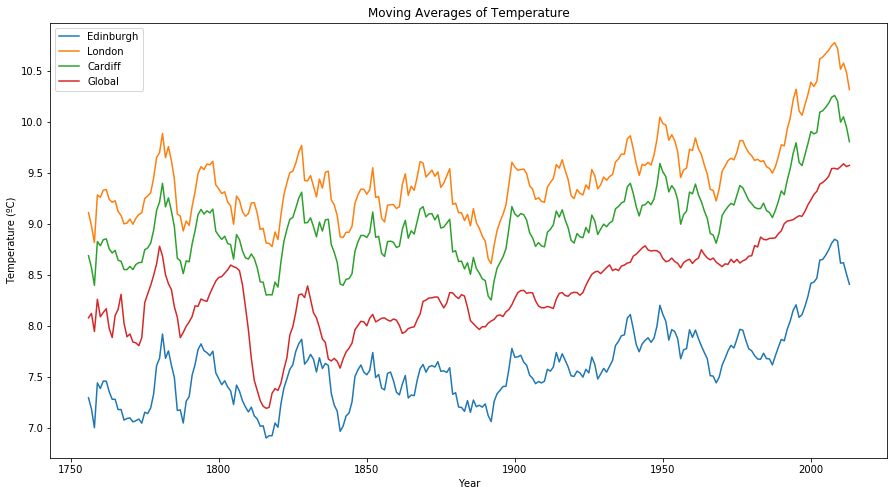

In [13]:
moving_averages['Edinburgh'].plot(figsize = (15,8))
moving_averages['London'].plot(figsize = (15,8))
moving_averages['Cardiff'].plot(figsize = (15,8))
moving_averages['Global'].plot(figsize = (15,8))
plt.title('Moving Averages of Temperature')
plt.ylabel('Temperature (ºC)')
plt.legend()
plt.show()

### Correlation Coefficients

In [14]:
dataset.corr()

,Cardiff Average Temperature,London Average Temperature,Edinburgh Average Temperature,Global Average Temperature
Cardiff Average Temperature,1.000000,0.991755,0.969152,0.588579
London Average Temperature,0.991755,1.000000,0.950873,0.563099
Edinburgh Average Temperature,0.969152,0.950873,1.000000,0.592681
Global Average Temperature,0.588579,0.563099,0.592681,1.000000


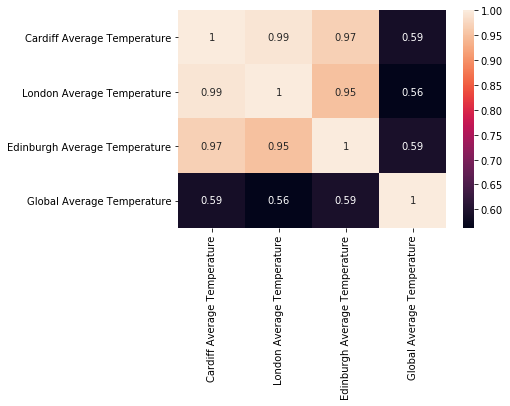

In [15]:
sn.heatmap(dataset.corr(), annot=True)
plt.show()